In [103]:
import cv2
import numpy as np
import scipy.signal
# from scipy import signal
#from tqdm import tqdm
#import imutils
#from collections import deque
#from imutils.video import VideoStream
import argparse
from matplotlib import pyplot as plt
import cv2   
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
#from skimage import io, img_as_float, img_as_ubyte, exposure
from os.path import isfile, join
import os.path, sys
from pylab import gca
from scipy.stats import norm
from scipy.stats import multivariate_normal
'''
Make frame thicker, make tick pointing inside, make tick thicker
default frame width is 2, default tick width is 1.5
'''
def frame_tick(frame_width = 2, tick_width = 1.5):
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(frame_width)
    plt.tick_params(direction = 'in', 
                    width = tick_width)

'''
legend:
default location : upper left
default fontsize: 8
Frame is always off
'''
def legend(location = 'upper left', fontsize = 8):
    plt.legend(loc = location, fontsize = fontsize, frameon = False)
    
'''
savefig:
bbox_inches is always tight
'''
def savefig(filename):
    plt.savefig(filename, bbox_inches = 'tight')
    
dpi = 300

In [104]:
vid = 'cleaned2_160_750_20.mp4'

In [105]:
def distance(x1,x2,y1,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

def findangle(a,b,c,d):
    movementvec = np.array([a-c,b-d])
    hori = np.array([0,-1])
    mag = np.linalg.norm(movementvec)
    if(mag == 0):
        return 0
    movementvec /= mag
    return np.arccos(np.dot(movementvec,hori)) * 180 / np.pi

def anglewh(w,h):
    return np.arctan(h/w) *180.0/ np.pi
    
    
mmtopixel = 14 * 1e-6
frameps = 9800 

In [106]:
cap = cv2.VideoCapture(vid)
previousFrame=None

xys = {}
spdang = {}
dists = {}

velocity=[]
direction=[]

fps = 5
size = (int(cap.get(3)) , int(cap.get(4))) 
print('size', size)

fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
out = cv2.VideoWriter('contour.avi', fourcc , float(fps), size)

i = 1 
while(cap.isOpened()):
    
    ret, frame = cap.read()

    if previousFrame is not None:
        pass
    previousFrame=frame
    try:
        gray = cv2.cvtColor(previousFrame, cv2.COLOR_BGR2GRAY)
    except:
        break
    gray =cv2.resize(gray,(832, 170))
  #cv2.imshow("grayframe",gray)
    ret, frame = cap.read()
    try:
        gray1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    except:
        break;
    gray1 = cv2.resize(gray1,(832, 170))
  
    difference = cv2.absdiff(gray1, gray)
  

    ret,thresh = cv2.threshold(difference, 40, 255, 0)

    cnts, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    final_frame = cv2.resize(frame,(832, 170))
    for cn in cnts:
        if cv2.arcLength(cn,True)> 10:
            (x, y, w, h) = cv2.boundingRect(cn)
            
            wh = str(w) + "," + str(h) 
            
            xyt = [x,y,i]
            
            if(xys.get(wh) == None):
                xys[wh] = xyt
            
            else:
                xyt0 = xys.get(wh)
                dis = distance(x,xyt0[0],y,xyt0[1])
                speed = dis / (i-xyt0[2]) *frameps * mmtopixel 
                
                angle = anglewh(w,h)
                
                
                spdang[wh] = [speed,angle]
                
                text = "V=" + str(round(speed,4)) + "Theta =" + str(round(angle,4))
                cv2.putText(final_frame, text, (int(x), int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.25 ,(255,255,255))
                
                velocity.append(speed)
                direction.append(direction)
            
            cv2.rectangle(final_frame, (x, y), (x + w, y + h), (0, 255, 0), 1)
            cv2.imshow('frame',final_frame)   
            print('shape',final_frame.shape)
    i += 1 
    
    out.write(final_frame)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


size (832, 170)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shap

<ipython-input-106-85dc6cd8fcb8>:60: RuntimeWarning: divide by zero encountered in double_scalars
  speed = dis / (i-xyt0[2]) *frameps * mmtopixel


shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)
shape (170, 832, 3)


In [107]:
print(spdang)

{'9,11': [1.2031495554969724, 50.71059313749964], '11,11': [0.5231651385710505, 45.0], '9,13': [1.022628421709904, 55.30484646876604], '16,11': [0.0, 34.5085229876684], '10,10': [1.0938166790755306, 45.0], '13,25': [0.0, 62.52556837372287], '19,22': [0.0, 49.18491612511842], '6,6': [1.5383030303030305, 45.0], '5,5': [1.3639684536697725, 45.0], '13,18': [0.0, 54.16234704572172], '23,7': [0.0, 16.927513064147043], '8,6': [1.3304434295052057, 36.86989764584402], '9,9': [1.486548303542617, 45.0], '4,5': [1.910974871629661, 51.34019174590991], '4,4': [1.6053550995860524, 45.0], '7,7': [1.775300147517967, 45.0], '16,24': [0.0, 56.309932474020215], '13,19': [1.75883145467393, 55.61965527615514], '14,10': [0.0, 35.53767779197438], '18,23': [0.0, 51.95295746817391], '5,6': [1.5671355057033876, 50.19442890773481], '12,15': [0.0, 51.34019174590991], '7,5': [1.4865818948764553, 35.53767779197438], '10,13': [17.87711261697481, 52.43140797117251], '16,12': [0.49, 36.86989764584402], '6,7': [0.797549

In [108]:
speeds = []
angles = [] 
for key, value in spdang.items():
    if(value[0] == np.inf):
        continue
    speeds.append(value[0])
    angles.append(value[1])
    

In [109]:
print(angles)

[50.71059313749964, 45.0, 55.30484646876604, 34.5085229876684, 45.0, 62.52556837372287, 49.18491612511842, 45.0, 45.0, 54.16234704572172, 16.927513064147043, 36.86989764584402, 45.0, 51.34019174590991, 45.0, 45.0, 56.309932474020215, 55.61965527615514, 35.53767779197438, 51.95295746817391, 50.19442890773481, 51.34019174590991, 35.53767779197438, 52.43140797117251, 36.86989764584402, 49.39870535499554, 52.125016348901795, 48.81407483429035, 38.659808254090095, 49.39870535499554, 45.0, 57.094757077012105, 49.635463426902646, 32.9052429229879, 45.0, 48.012787504183336, 49.76364169072618, 64.3589941756947, 53.13010235415598, 37.568592028827496, 39.8055710922652, 71.56505117707799, 67.61986494804043, 51.34019174590991, 40.60129464500447, 50.19442890773481, 39.8055710922652, 47.48955292199915, 56.309932474020215, 50.90614111377051, 73.73979529168804, 48.36646066342981, 53.13010235415598, 56.309932474020215, 53.9726266148964, 47.290610042638534, 45.0, 55.00797980144134, 53.13010235415598, 32.

In [70]:
import scipy
from scipy.stats import norm 


mean1, std1 = scipy.stats.distributions.norm.fit(speeds)
print(mean1, std1)

1.2607359627972086 1.3469641823421632


In [71]:
import scipy
from scipy.stats import norm 


mean2, std2 = scipy.stats.distributions.norm.fit(angles)
print(mean2, std2)

42.01952084813739 10.075947789622115


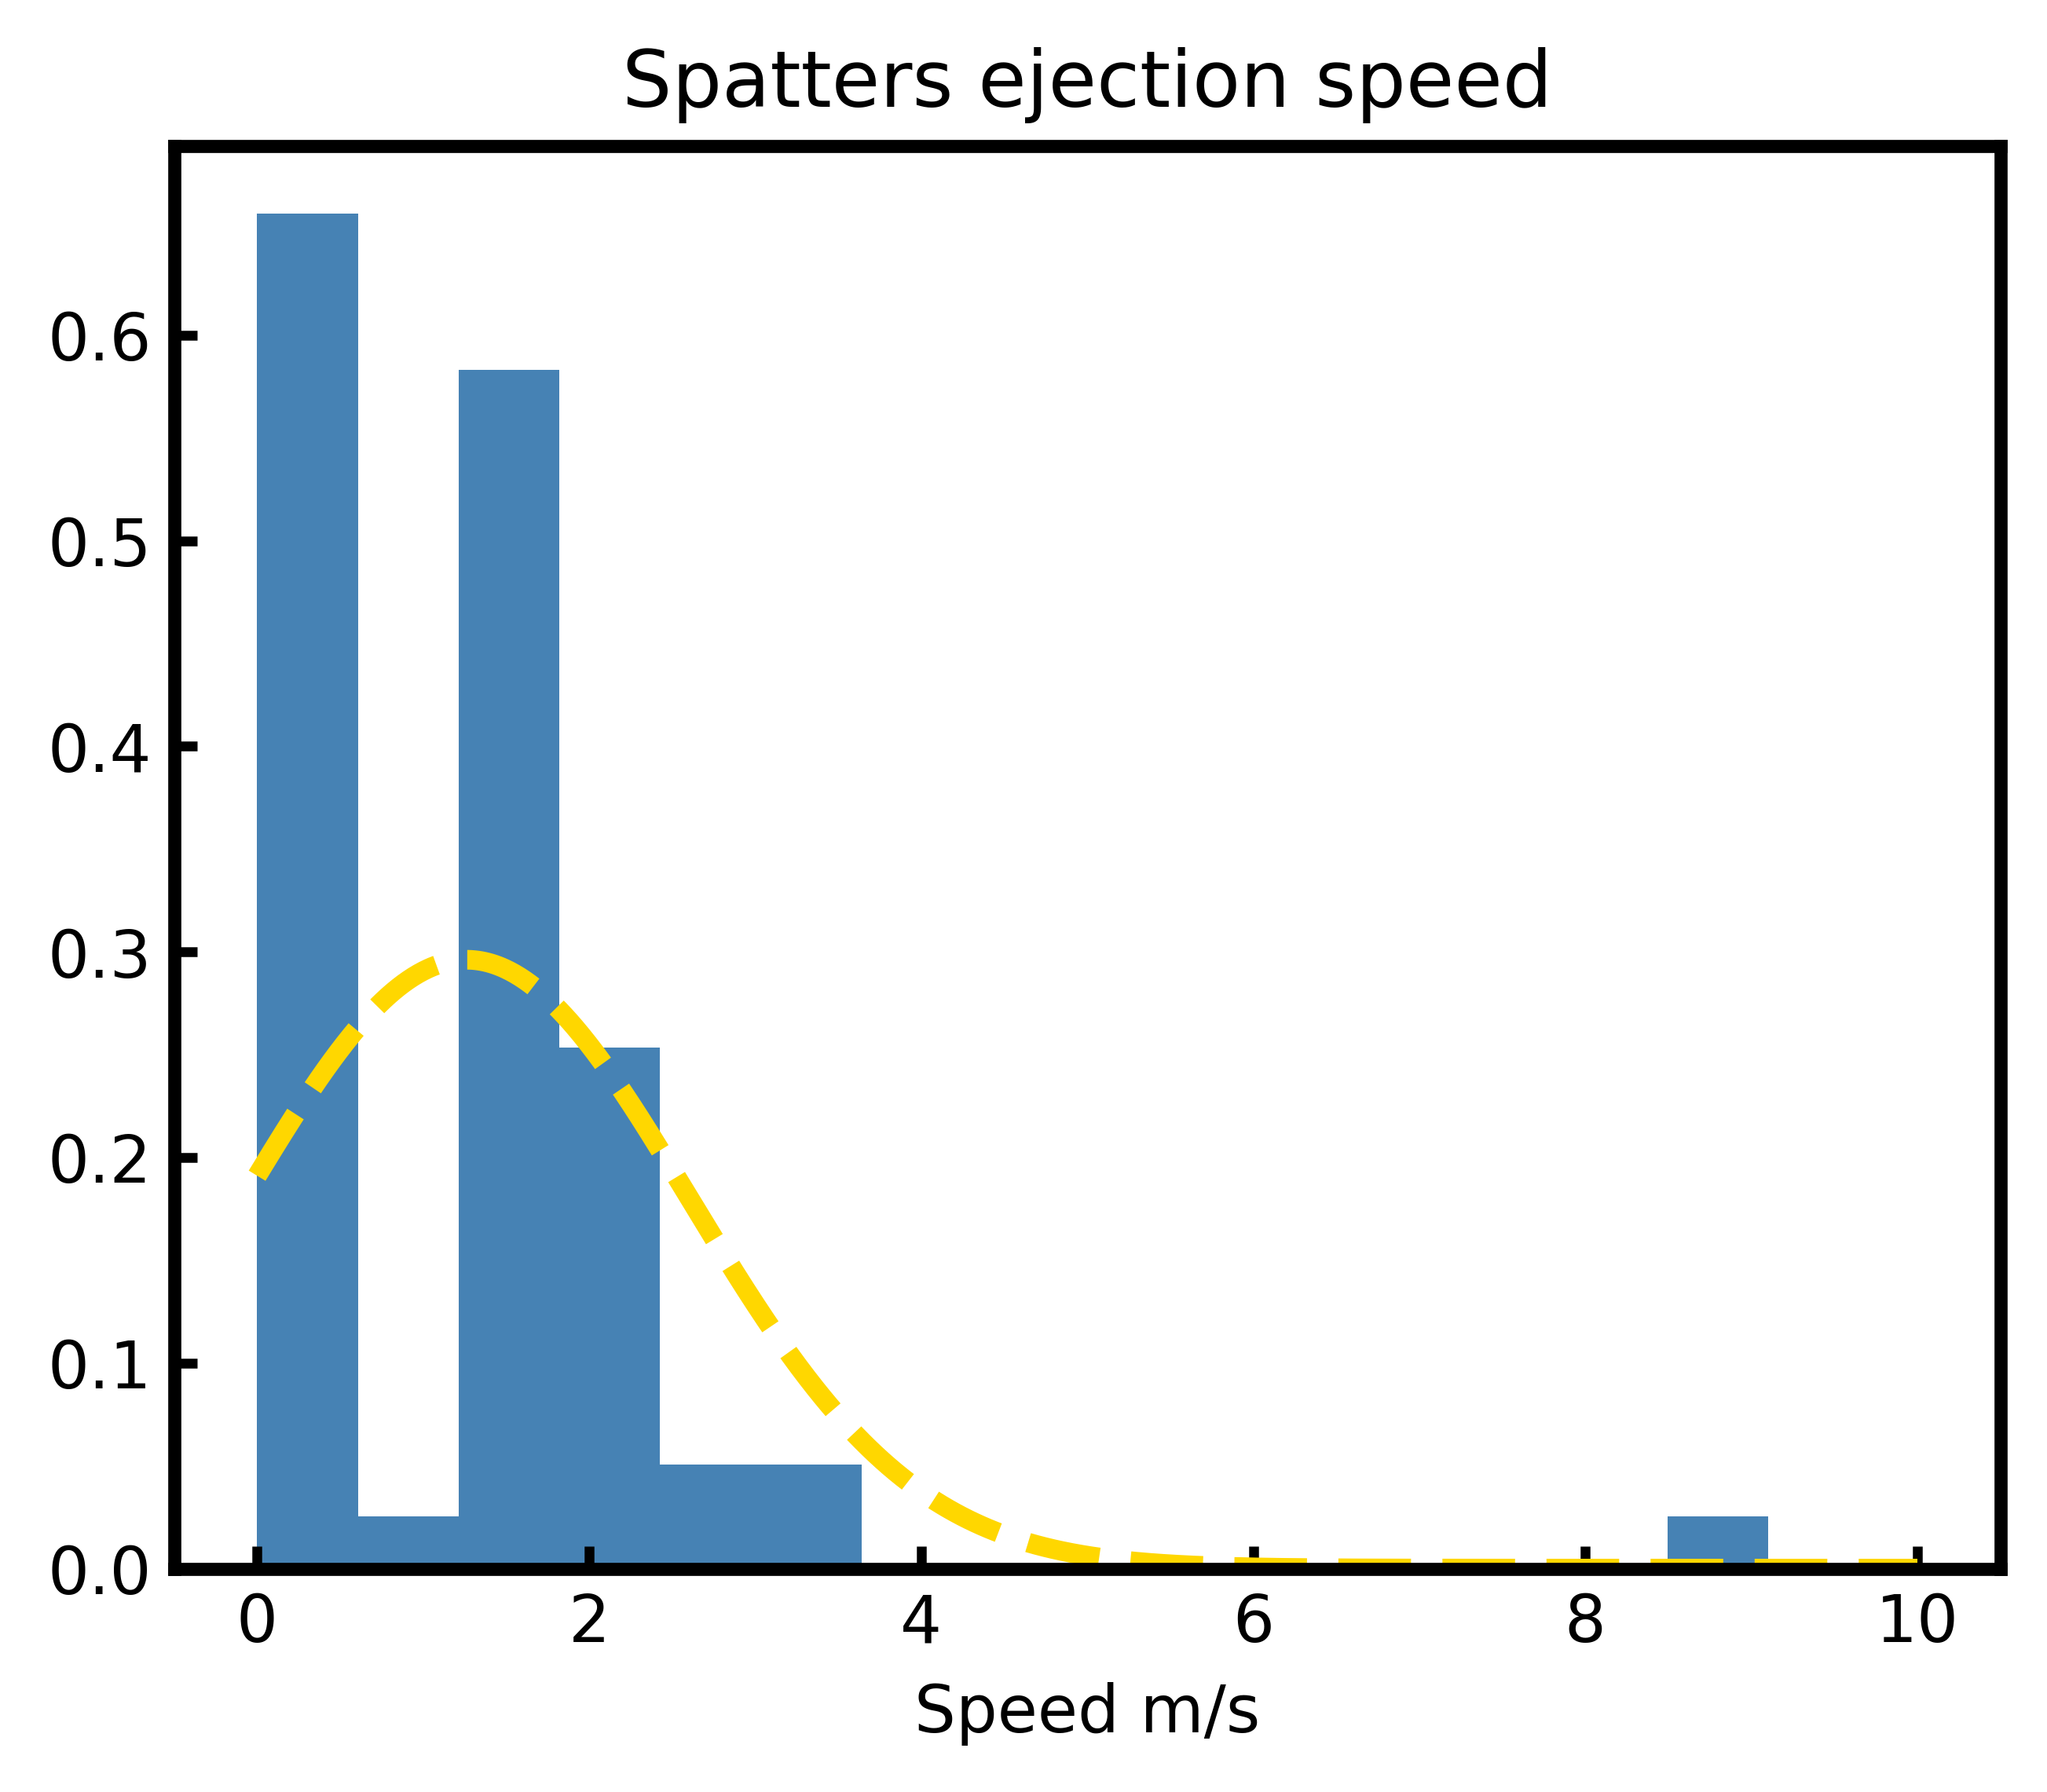

In [93]:
fig=plt.figure(figsize=(5,4), dpi=600)
plt.hist(speeds, bins=15, density=True, color='steelblue')
plt.xlabel('Speed m/s')
plt.title('Spatters ejection speed')
x= np.linspace(0, 10, 1000)
y= norm.pdf(x, mean1, std1)
plt.plot(x,y, '--', color='gold', linewidth=3)
frame_tick()
plt.show()

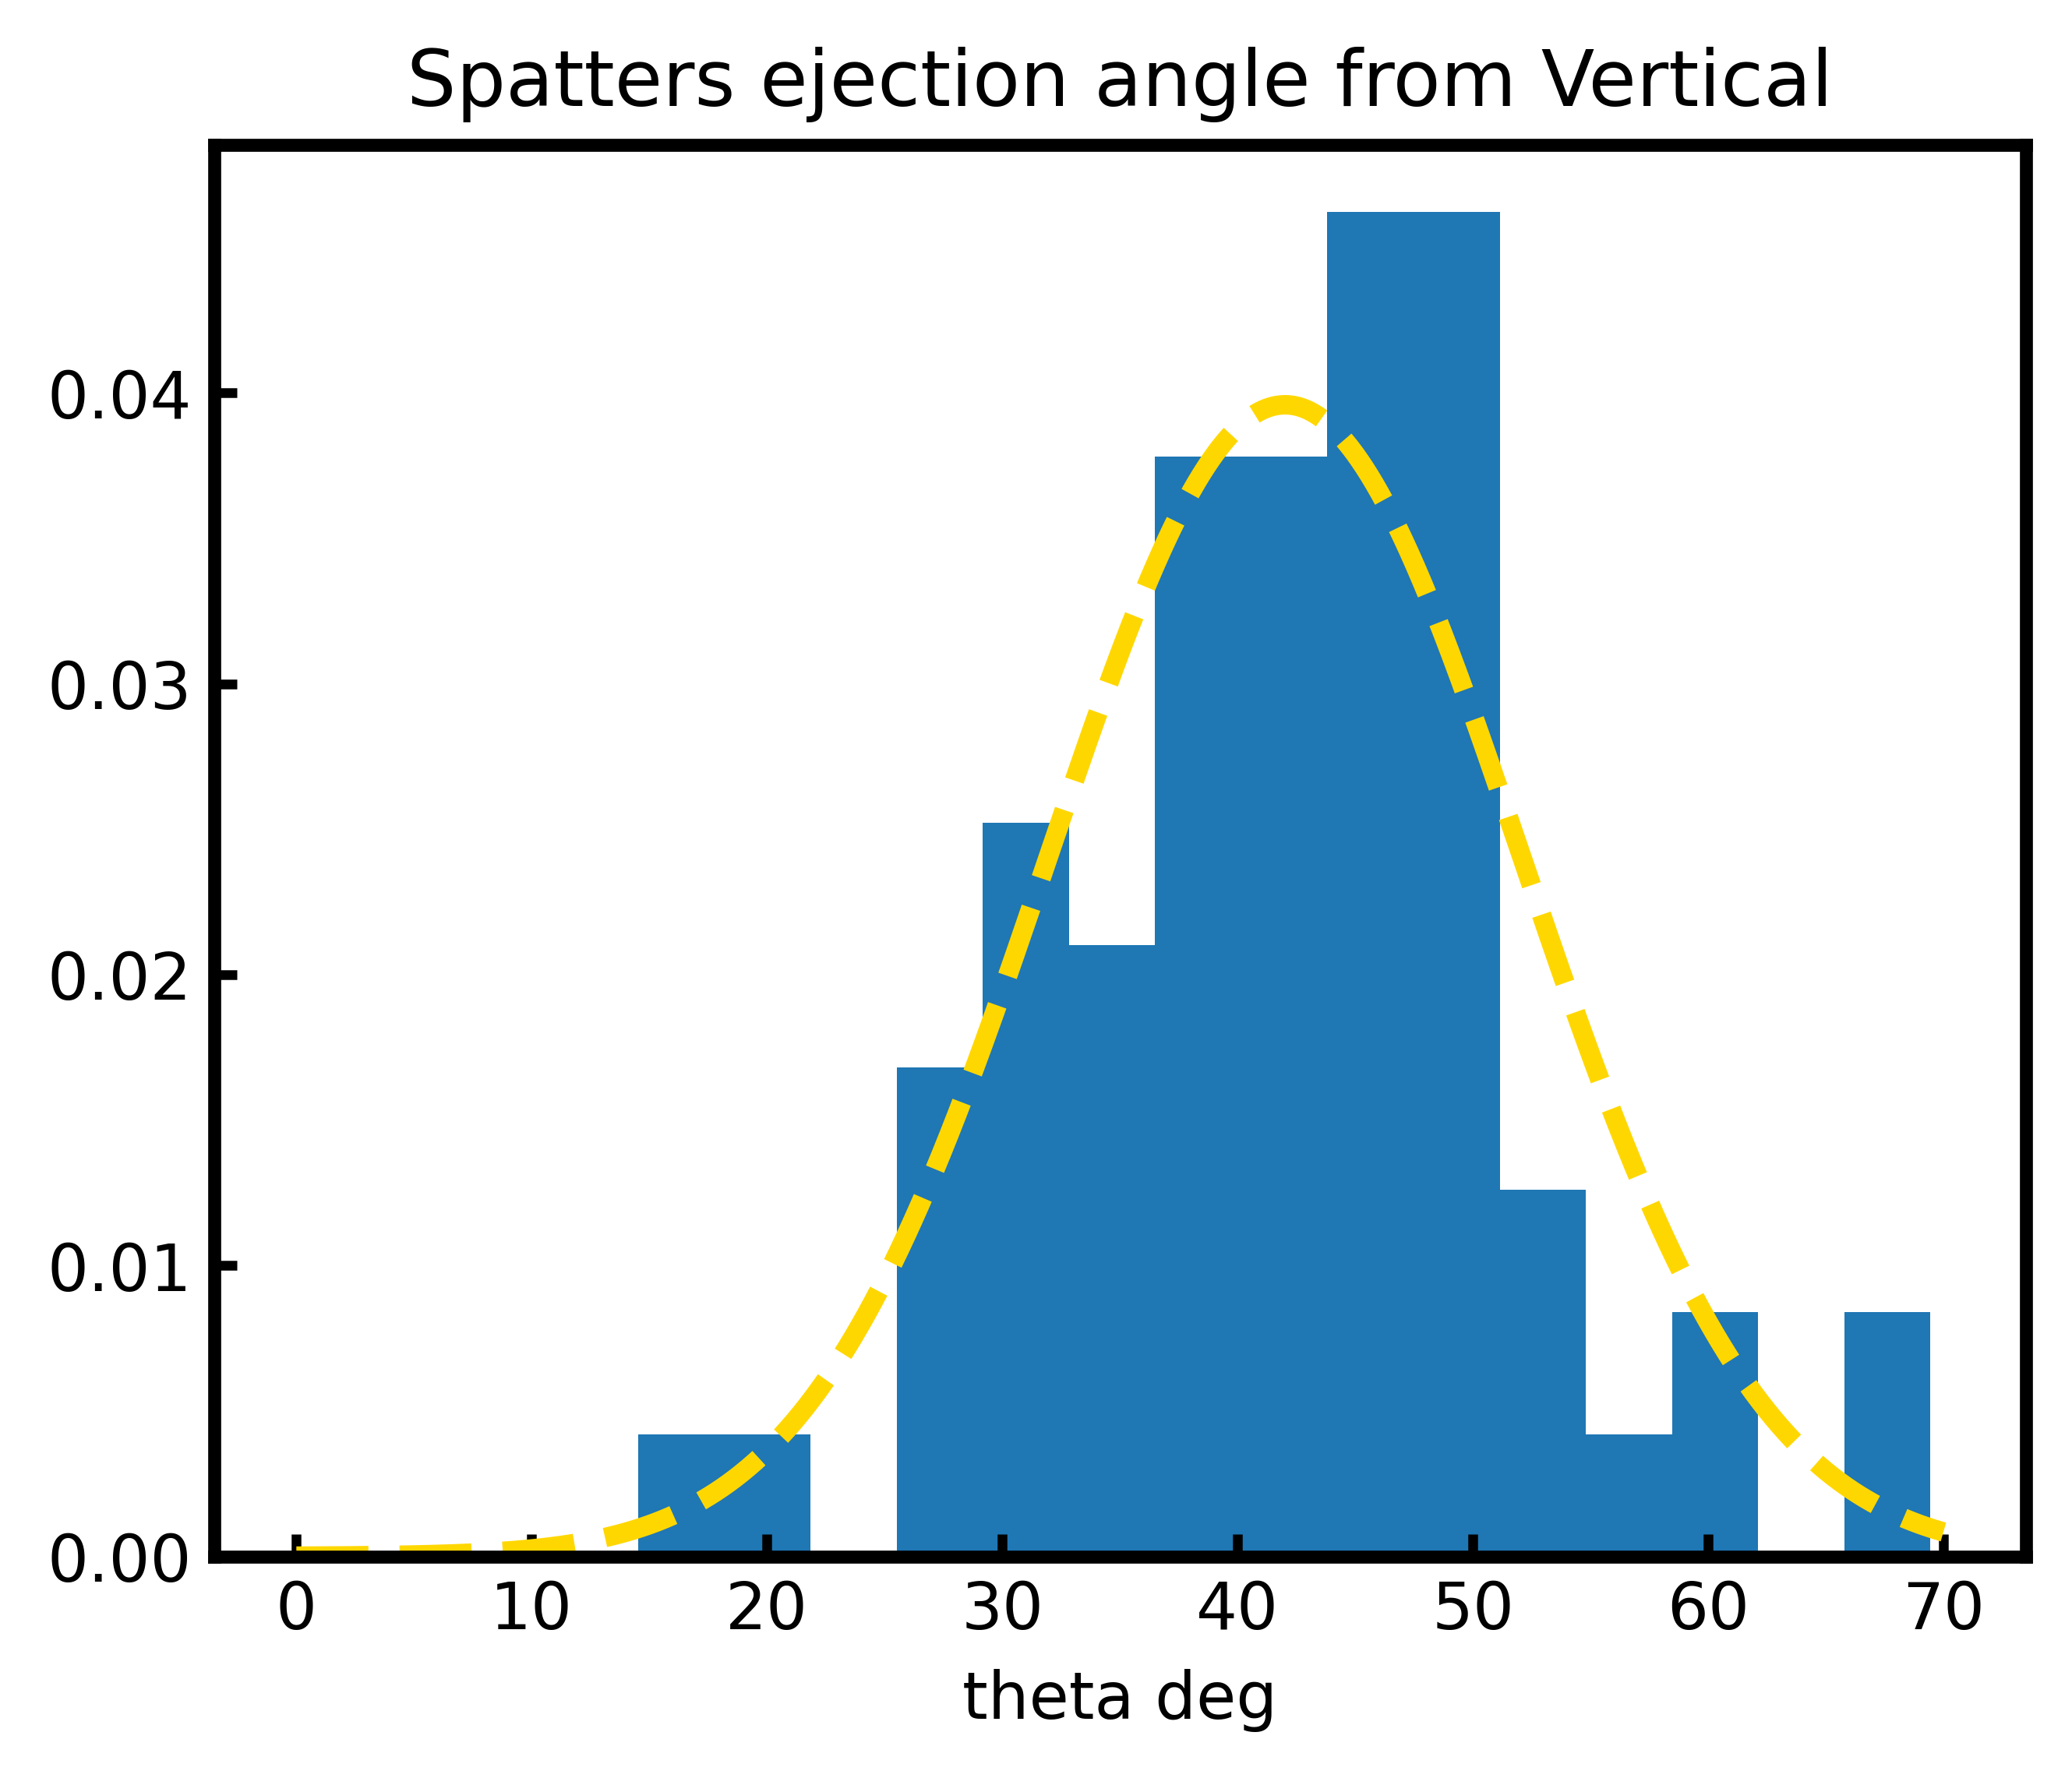

In [94]:
fig=plt.figure(figsize=(5,4), dpi=600)
plt.hist(angles, bins=15, density=True)
plt.xlabel('theta deg')
plt.title('Spatters ejection angle from Vertical')
x= np.linspace(0, 70, 1000)
y= norm.pdf(x, mean2, std2)
plt.plot(x,y, '--', color='gold', linewidth=3)
frame_tick()
plt.show()